<a href="https://colab.research.google.com/github/cgaravitoc/AAD/blob/main/S1_Qubits_and_superposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q-AI: Summer School on Quantum Artificial Intelligence**

Universidad del Rosario - School of Science and Engineering

Université du Québec à Trois-Rivières (UQTR), Canada

**Fundamentals of Quantum Computing** (session 1)



Professor: [Nicolás Avilán Vargas](http://www.linkedin.com/in/nicoavilanv)

nicolasg.avilan@urosario.edu.co

# **Fundamentals: qubits and superposition** (sesion 1)




This guide introduces Qiskit, a powerful open-source quantum computing framework developed by IBM, designed to run in Google Colab. It is tailored for beginners with no prior experience in quantum programming. You'll learn fundamental quantum computing concepts, build simple quantum circuits, visualize results, and complete practical exercises to solidify your understanding.

`%pip install` ensures the package is installed in the same Python environment that the notebook is using.

Explicitly targets the notebook's active Python kernel, making it more reliable for ensuring the installed package is immediately available for use in the notebook.
Advantages:
* Avoids environment mismatches by installing directly into the kernel's environment.
* Often includes additional logic to handle notebook-specific requirements (e.g., restarting the kernel if needed, though this is rare in Colab).

## Install Qiskit

In [1]:
%pip install qiskit --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 8.4 MB/s eta 0:00:00


In [2]:
%pip install pylatexenc --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 607.7 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
%pip install qiskit-aer --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 35.3 MB/s eta 0:00:00


This guide is compatible with Qiskit version 2.1.1

In [4]:
import qiskit
print(qiskit.__version__)

2.1.1


Import Qiskit modules

In [5]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector, Operator
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt
import numpy as np

## Quantum states 1

Now we define quantum states

In [6]:
u = Statevector([(1 + 2.0j) / 3, -2 / 3])
v = Statevector([1 / 3, 2 / 3])

The `.draw("latex")` method allows us to visualize the quantum state using Dirac's bra-ket notation.

In [7]:
u.draw("latex")

<IPython.core.display.Latex object>

The squared magnitudes of the state coefficients represent the probabilities of measuring the system in each corresponding quantum state.

In [8]:
u.probabilities()

array([0.55555556, 0.44444444])

In [11]:
(1/3)**2+(2/3)**2

0.5555555555555556

In [12]:
v.draw("latex")

<IPython.core.display.Latex object>

In [13]:
v.probabilities()

array([0.11111111, 0.44444444])

It is necessary to verify whether a quantum state is properly defined, which typically involves ensuring that it is normalized.

In [14]:
display(u.is_valid())
display(v.is_valid())

True

False

In [15]:
print(u.probabilities().sum())

1.0


In [16]:
print(v.probabilities().sum())

0.5555555555555556


The quantum state of a single qubit can be visualized on the [Bloch sphere](https://en.wikipedia.org/wiki/Bloch_sphere).

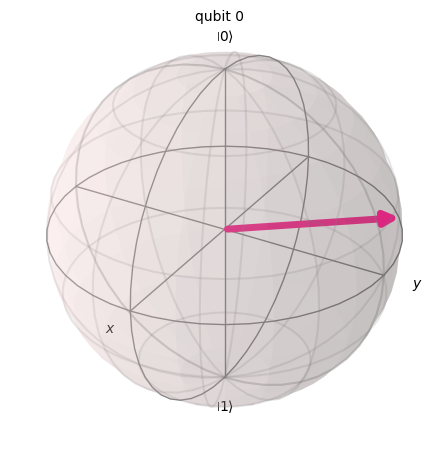

In [17]:
plot_bloch_multivector(u)

**Quantum Measurement Procedure**

In [32]:
print(u.measure()[0])

1


Each measurement gives a different result. We could save the result of some specific

In [22]:
u_ = u.measure()
u_

(np.str_('1'),
 Statevector([ 0.+0.j, -1.+0.j],
             dims=(2,)))

In [35]:
print(u_)  # Print the complete output tuple.
print(u_[0])  # Display the measurement result.
u_[1].draw("latex")  # Display the collapsed quantum state after measurement.
print(u_[1].probabilities())  # Display the probability distribution after measurement.

(np.str_('1'), Statevector([ 0.+0.j, -1.+0.j],
            dims=(2,)))
1
[0. 1.]


In [24]:
statistics = u.sample_counts(1000)  # Record the outcome frequencies from 1000 measurement samples.
statistics

{np.str_('0'): np.int64(563), np.str_('1'): np.int64(437)}

In [25]:
u.probabilities()

array([0.55555556, 0.44444444])

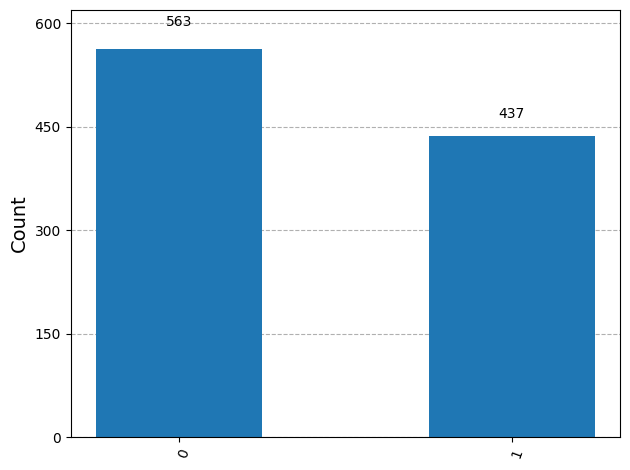

In [26]:
plot_histogram(statistics)

### Excercise:

* Define the quantum state
$|\psi \rangle = \frac{1}{\sqrt 2}|0 \rangle - \frac{1}{\sqrt 2}|1 \rangle$
* Verify if $∣\psi \rangle$ is a well-defined quantum state.
* Evaluate the probabilities of measuring $∣\psi \rangle$ in the computational basis.
* Plot $∣\psi \rangle$ on the Bloch sphere.
* Simulate multiple measurements to verify the probabilities empirically.


In [31]:
# define the quantum state
e = Statevector([(1 + np.sqrt(2.0)) / 3, -1 / np.sqrt(2.0)])



In [28]:
# verify quantum state

np.float64(1.4142135623730951)

## Quantum states 2

Previously, we defined a quantum state explicitly as a single vector. In practical quantum algorithms, however, it is typical to start by designing quantum circuits, where qubits are implicitly created and their evolution is governed by the sequence of quantum gates applied.

Create a quantum circuit with 1 qubit and 1 classical bit

Qubits are automatically initialized to |0⟩

The `.h(0)` command applies a Hadamard gate to qubit 0, placing it into a superposition of the basis states ∣0⟩ and ∣1⟩.

In [ ]:
qc = QuantumCircuit(1, 1)

qc.h(0)

# Measure the qubit and store result in classical bit
qc.measure(0, 0)

# Draw the circuit
qc.draw('mpl')

Now, we simulate multiple measurements to empirically verify the probabilities of the resulting quantum state in the circuit.

In [ ]:
# Initialize the simulator
simulator = AerSimulator()

# Run the circuit with 1024 shots
result = simulator.run(qc, shots=1024).result()

# Get and plot measurement outcomes
counts = result.get_counts()
display(plot_histogram(counts))

## Quantum states 3

Once again, we begin by designing a quantum circuit, where the qubit is implicitly initialized and its evolution is governed by the sequence of quantum gates applied.


In [ ]:
# Create a circuit with 1 qubit (no measurement)
qc = QuantumCircuit(1)
# Qubit initialized to |0⟩
qc.h(0)  # Apply Hadamard gate for superposition
qc.save_statevector()   # Explicitly save the statevector

qc.draw('mpl')

In [ ]:
# Use statevector simulator
simulator = AerSimulator(method='statevector')
result = simulator.run(qc).result()
statevector = result.get_statevector()
statevector.draw('latex')

In [ ]:
plot_bloch_multivector(statevector)

## Suggested exercices 1

**Exercise 1**: _Initializing and Measuring a Qubit_

* Create a quantum circuit with 1 qubit and 1 classical bit.

* Do not apply any gates (qubit remains in |0⟩).

* Draw the circuit.

* Measure the qubit and plot the histogram with 1024 shots.

* *Question*: What is the outcome, and why does it occur?

**Exercise 2**: *Creating Superposition*

* Create a circuit with 1 qubit and 1 classical bit.

* Apply a Hadamard gate to create superposition, then measure.

* Draw the circuit.

* Simulate with 2048 shots and plot the histogram.

* *Question*: Are the probabilities for |0⟩ and |1⟩ approximately equal? Explain why.

**Exercise 3**: *Visualizing Superposition*

* Create a circuit with 1 qubit (no classical bit or measurement).
* Apply a Hadamard gate.

* Draw the circuit.

* Return the output statevector of an instruction using [from_instruction()](https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.quantum_info.Statevector#from_instruction)
* Use the statevector simulator to plot the qubit's state on the Bloch sphere.
* *Question*: How does the Bloch sphere confirm the qubit is in superposition?

**Exercise 4**: *Effect of Double Hadamard*

* Create a circuit with 1 qubit and 1 classical bit.

* Apply two Hadamard gates in sequence, then measure.

* Draw the circuit.

* Simulate with 1024 shots and plot the histogram.

* *Question*: What is the outcome, and why? (Hint: Compute the effect of H × H mathematically.)

**Exercise 5**: *Superposition with Two Qubits*

* Create a circuit with 2 qubits and 2 classical bits.

* Apply Hadamard gates to both qubits, then measure.

* Draw the circuit.

* Simulate with 1024 shots and plot the histogram.

* *Question*: List the possible outcomes and their expected probabilities.

## Additional Resources

* [IBM Quantum learning](https://quantum.cloud.ibm.com/learning/en)

* [IBM’s Perspective on Quantum Computing: Concepts, Applications, and Innovations](https://www.ibm.com/think/topics/quantum-computing)

* [What we can learn about quantum physics from a single qubit](https://arxiv.org/pdf/1312.1463)

To report errors or suggestions: nicolasg.avilan@urosario.edu.co